In [1]:
import numpy as np
import sys
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.interpolate import interp1d
import io
import math
import pandas as pd
import mplhep as hep
sys.path.append('../utils')
from fast_analysis_utils import ExtractFromYaml

hep.style.use("ALICE")

def plot_syst(x, ex, y, ey, ax, color, width):
    for i in range(len(x)):
        box_x = x[i] - ex
        box_y = y[i] - ey[i]
        box_width = 2 * ex
        box_height = 2 * ey[i]
        rect = patches.Rectangle((box_x, box_y), box_width, box_height, fill=False, edgecolor=color, linewidth=width)
        ax.add_patch(rect)

ppCrossSection =  59.4e6 #nb
BrJpsiToMuMu =  0.05961
BrPsi2sToMuMu =  0.008
deltaY = 1.5

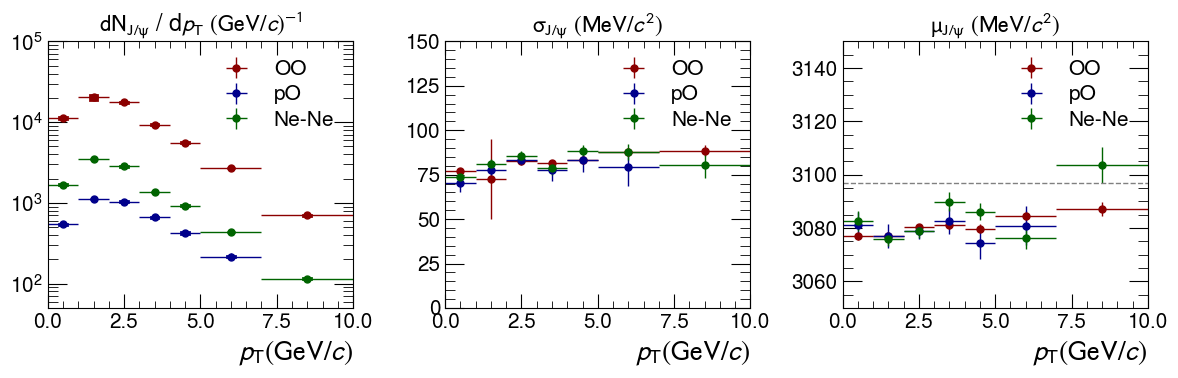

In [6]:
# OO - Raw yield - 2025  data - Time association
dfJpsiRawYieldOOTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25ae_cpass0/pt_dependence/systematic_sig_Jpsi.txt', sep=' ')
ptMinOOTimeAssoc = dfJpsiRawYieldOOTimeAssocVsPt["x_min"]
ptMaxOOTimeAssoc = dfJpsiRawYieldOOTimeAssocVsPt["x_max"]
ptOOTimeAssoc = (ptMinOOTimeAssoc + ptMaxOOTimeAssoc) / 2.
errPtOOTimeAssoc = (ptMaxOOTimeAssoc - ptMinOOTimeAssoc) / 2.
#jpsiRawYieldOOTimeAssocVsPt = dfJpsiRawYieldOOTimeAssocVsPt["val"] / (2 * errPtOOTimeAssoc * deltaY)
#jpsiStatRawYieldOOTimeAssocVsPt = dfJpsiRawYieldOOTimeAssocVsPt["stat"] / (2 * errPtOOTimeAssoc * deltaY)
#jpsiSystRawYieldOOTimeAssocVsPt = dfJpsiRawYieldOOTimeAssocVsPt["syst"] / (2 * errPtOOTimeAssoc * deltaY)
jpsiRawYieldOOTimeAssocVsPt = dfJpsiRawYieldOOTimeAssocVsPt["val"] / (2 * errPtOOTimeAssoc)
jpsiStatRawYieldOOTimeAssocVsPt = dfJpsiRawYieldOOTimeAssocVsPt["stat"] / (2 * errPtOOTimeAssoc)
jpsiSystRawYieldOOTimeAssocVsPt = dfJpsiRawYieldOOTimeAssocVsPt["syst"] / (2 * errPtOOTimeAssoc)

dfPsi2sRawYieldOOTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25ae_cpass0/pt_dependence/systematic_sig_Psi2s.txt', sep=' ')
ptMinOOTimeAssoc = dfPsi2sRawYieldOOTimeAssocVsPt["x_min"]
ptMaxOOTimeAssoc = dfPsi2sRawYieldOOTimeAssocVsPt["x_max"]
ptOOTimeAssoc = (ptMinOOTimeAssoc + ptMaxOOTimeAssoc) / 2.
errPtOOTimeAssoc = (ptMaxOOTimeAssoc - ptMinOOTimeAssoc) / 2.
#psi2sRawYieldOOTimeAssocVsPt = dfPsi2sRawYieldOOTimeAssocVsPt["val"] / (2 * errPtOOTimeAssoc * deltaY)
#psi2sStatRawYieldOOTimeAssocVsPt = dfPsi2sRawYieldOOTimeAssocVsPt["stat"] / (2 * errPtOOTimeAssoc * deltaY)
#psi2sSystRawYieldOOTimeAssocVsPt = dfPsi2sRawYieldOOTimeAssocVsPt["syst"] / (2 * errPtOOTimeAssoc * deltaY)
psi2sRawYieldOOTimeAssocVsPt = dfPsi2sRawYieldOOTimeAssocVsPt["val"] / (2 * errPtOOTimeAssoc)
psi2sStatRawYieldOOTimeAssocVsPt = dfPsi2sRawYieldOOTimeAssocVsPt["stat"] / (2 * errPtOOTimeAssoc)
psi2sSystRawYieldOOTimeAssocVsPt = dfPsi2sRawYieldOOTimeAssocVsPt["syst"] / (2 * errPtOOTimeAssoc)

# pO - Raw yield - 2025  data - Time association
dfJpsiRawYieldpOTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25ad_cpass0/pt_dependence/systematic_sig_Jpsi.txt', sep=' ')
ptMinpOTimeAssoc = dfJpsiRawYieldpOTimeAssocVsPt["x_min"]
ptMaxpOTimeAssoc = dfJpsiRawYieldpOTimeAssocVsPt["x_max"]
ptpOTimeAssoc = (ptMinpOTimeAssoc + ptMaxpOTimeAssoc) / 2.
errPtpOTimeAssoc = (ptMaxpOTimeAssoc - ptMinpOTimeAssoc) / 2.
#jpsiRawYieldpOTimeAssocVsPt = dfJpsiRawYieldpOTimeAssocVsPt["val"] / (2 * errPtpOTimeAssoc * deltaY)
#jpsiStatRawYieldpOTimeAssocVsPt = dfJpsiRawYieldpOTimeAssocVsPt["stat"] / (2 * errPtpOTimeAssoc * deltaY)
#jpsiSystRawYieldpOTimeAssocVsPt = dfJpsiRawYieldpOTimeAssocVsPt["syst"] / (2 * errPtpOTimeAssoc * deltaY)
jpsiRawYieldpOTimeAssocVsPt = dfJpsiRawYieldpOTimeAssocVsPt["val"] / (2 * errPtpOTimeAssoc)
jpsiStatRawYieldpOTimeAssocVsPt = dfJpsiRawYieldpOTimeAssocVsPt["stat"] / (2 * errPtpOTimeAssoc)
jpsiSystRawYieldpOTimeAssocVsPt = dfJpsiRawYieldpOTimeAssocVsPt["syst"] / (2 * errPtpOTimeAssoc)

# Ne-Ne - Raw yield - 2025  data - Time association
dfJpsiRawYieldNeNeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25af_cpass0/pt_dependence/systematic_sig_Jpsi.txt', sep=' ')
ptMinNeNeTimeAssoc = dfJpsiRawYieldNeNeTimeAssocVsPt["x_min"]
ptMaxNeNeTimeAssoc = dfJpsiRawYieldNeNeTimeAssocVsPt["x_max"]
ptNeNeTimeAssoc = (ptMinNeNeTimeAssoc + ptMaxNeNeTimeAssoc) / 2.
errPtNeNeTimeAssoc = (ptMaxNeNeTimeAssoc - ptMinNeNeTimeAssoc) / 2.
#jpsiRawYieldNeNeTimeAssocVsPt = dfJpsiRawYieldNeNeTimeAssocVsPt["val"] / (2 * errPtNeNeTimeAssoc * deltaY)
#jpsiStatRawYieldNeNeTimeAssocVsPt = dfJpsiRawYieldNeNeTimeAssocVsPt["stat"] / (2 * errPtNeNeTimeAssoc * deltaY)
#jpsiSystRawYieldNeNeTimeAssocVsPt = dfJpsiRawYieldNeNeTimeAssocVsPt["syst"] / (2 * errPtNeNeTimeAssoc * deltaY)
jpsiRawYieldNeNeTimeAssocVsPt = dfJpsiRawYieldNeNeTimeAssocVsPt["val"] / (2 * errPtNeNeTimeAssoc)
jpsiStatRawYieldNeNeTimeAssocVsPt = dfJpsiRawYieldNeNeTimeAssocVsPt["stat"] / (2 * errPtNeNeTimeAssoc)
jpsiSystRawYieldNeNeTimeAssocVsPt = dfJpsiRawYieldNeNeTimeAssocVsPt["syst"] / (2 * errPtNeNeTimeAssoc)

# Mean - 2025  data - Time association
dfJpsiMeanOOTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25ae_cpass0/pt_dependence/systematic_mean_Jpsi.txt', sep=' ')
jpsiMeanOOTimeAssocVsPt = dfJpsiMeanOOTimeAssocVsPt["val"] * 1000
jpsiStatMeanOOTimeAssocVsPt = dfJpsiMeanOOTimeAssocVsPt["stat"] * 1000
jpsiSystMeanOOTimeAssocVsPt = dfJpsiMeanOOTimeAssocVsPt["syst"] * 1000

dfJpsiMeanpOTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25ad_cpass0/pt_dependence/systematic_mean_Jpsi.txt', sep=' ')
jpsiMeanpOTimeAssocVsPt = dfJpsiMeanpOTimeAssocVsPt["val"] * 1000
jpsiStatMeanpOTimeAssocVsPt = dfJpsiMeanpOTimeAssocVsPt["stat"] * 1000
jpsiSystMeanpOTimeAssocVsPt = dfJpsiMeanpOTimeAssocVsPt["syst"] * 1000

dfJpsiMeanNeNeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25af_cpass0/pt_dependence/systematic_mean_Jpsi.txt', sep=' ')
jpsiMeanNeNeTimeAssocVsPt = dfJpsiMeanNeNeTimeAssocVsPt["val"] * 1000
jpsiStatMeanNeNeTimeAssocVsPt = dfJpsiMeanNeNeTimeAssocVsPt["stat"] * 1000
jpsiSystMeanNeNeTimeAssocVsPt = dfJpsiMeanNeNeTimeAssocVsPt["syst"] * 1000

# Width - 2025  data - Time association
dfJpsiWidthOOTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25ae_cpass0/pt_dependence/systematic_width_Jpsi.txt', sep=' ')
jpsiWidthOOTimeAssocVsPt = dfJpsiWidthOOTimeAssocVsPt["val"] * 1000
jpsiStatWidthOOTimeAssocVsPt = dfJpsiWidthOOTimeAssocVsPt["stat"] * 1000
jpsiSystWidthOOTimeAssocVsPt = dfJpsiWidthOOTimeAssocVsPt["syst"] * 1000

dfJpsiWidthpOTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25ad_cpass0/pt_dependence/systematic_width_Jpsi.txt', sep=' ')
jpsiWidthpOTimeAssocVsPt = dfJpsiWidthpOTimeAssocVsPt["val"] * 1000
jpsiStatWidthpOTimeAssocVsPt = dfJpsiWidthpOTimeAssocVsPt["stat"] * 1000
jpsiSystWidthpOTimeAssocVsPt = dfJpsiWidthpOTimeAssocVsPt["syst"] * 1000

dfJpsiWidthNeNeTimeAssocVsPt = pd.read_csv('/Users/lucamicheletti/GITHUB/dq_fitter/analysis/LHC25af_cpass0/pt_dependence/systematic_width_Jpsi.txt', sep=' ')
jpsiWidthNeNeTimeAssocVsPt = dfJpsiWidthNeNeTimeAssocVsPt["val"] * 1000
jpsiStatWidthNeNeTimeAssocVsPt = dfJpsiWidthNeNeTimeAssocVsPt["stat"] * 1000
jpsiSystWidthNeNeTimeAssocVsPt = dfJpsiWidthNeNeTimeAssocVsPt["syst"] * 1000

#################################
# Plot data
#################################

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
fig.subplots_adjust(wspace=0.05)

plot_syst(ptOOTimeAssoc, 0.125, jpsiRawYieldOOTimeAssocVsPt, jpsiSystRawYieldOOTimeAssocVsPt, axes[0], 'darkred', 2)
axes[0].errorbar(ptOOTimeAssoc, jpsiRawYieldOOTimeAssocVsPt, xerr=errPtOOTimeAssoc, yerr=jpsiStatRawYieldOOTimeAssocVsPt, fmt='o', color='darkred', ecolor='darkred', markerfacecolor='darkred', markersize=5, label=r'OO')
plot_syst(ptpOTimeAssoc, 0.125, jpsiRawYieldpOTimeAssocVsPt, jpsiSystRawYieldpOTimeAssocVsPt, axes[0], 'darkblue', 2)
axes[0].errorbar(ptpOTimeAssoc, jpsiRawYieldpOTimeAssocVsPt, xerr=errPtpOTimeAssoc, yerr=jpsiStatRawYieldpOTimeAssocVsPt, fmt='o', color='darkblue', ecolor='darkblue', markerfacecolor='darkblue', markersize=5, label=r'pO')
plot_syst(ptNeNeTimeAssoc, 0.125, jpsiRawYieldNeNeTimeAssocVsPt, jpsiSystRawYieldNeNeTimeAssocVsPt, axes[0], 'darkgreen', 2)
axes[0].errorbar(ptNeNeTimeAssoc, jpsiRawYieldNeNeTimeAssocVsPt, xerr=errPtNeNeTimeAssoc, yerr=jpsiStatRawYieldNeNeTimeAssocVsPt, fmt='o', color='darkgreen', ecolor='darkgreen', markerfacecolor='darkgreen', markersize=5, label=r'Ne-Ne')
axes[0].set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=20, labelpad=5)
axes[0].set_title(r'$dN_{J/\psi}$ / d$\it{p}_{\rm{T}}$ $(GeV/\it{c})^{-1}$')
axes[0].yaxis.set_label_coords(-0.08, 0.8)
axes[0].set_yscale('log')
axes[0].set_ylim(5e1, 1e5)
axes[0].set_xlim(0, 10)
axes[0].tick_params(axis='x', labelsize=15, labelbottom=True)
axes[0].tick_params(axis='y', labelsize=15)
axes[0].legend(fontsize=15)

axes[1].errorbar(ptOOTimeAssoc, jpsiWidthOOTimeAssocVsPt, xerr=errPtOOTimeAssoc, yerr=jpsiStatWidthOOTimeAssocVsPt, fmt='o', color='darkred', ecolor='darkred', markerfacecolor='darkred', markersize=5, label=r'OO')
axes[1].errorbar(ptpOTimeAssoc, jpsiWidthpOTimeAssocVsPt, xerr=errPtpOTimeAssoc, yerr=jpsiStatWidthpOTimeAssocVsPt, fmt='o', color='darkblue', ecolor='darkblue', markerfacecolor='darkblue', markersize=5, label=r'pO')
axes[1].errorbar(ptNeNeTimeAssoc, jpsiWidthNeNeTimeAssocVsPt, xerr=errPtNeNeTimeAssoc, yerr=jpsiStatWidthNeNeTimeAssocVsPt, fmt='o', color='darkgreen', ecolor='darkgreen', markerfacecolor='darkgreen', markersize=5, label=r'Ne-Ne')
axes[1].set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=20, labelpad=5)
axes[1].set_title(r'$\sigma_{J/\psi}$ $(MeV/\it{c}^{2})$')
axes[1].yaxis.set_label_coords(-0.08, 0.8)
axes[1].set_ylim(0, 150)
axes[1].set_xlim(0, 10)
axes[1].tick_params(axis='x', labelsize=15, labelbottom=True)
axes[1].tick_params(axis='y', labelsize=15)
axes[1].legend(fontsize=15)

axes[2].errorbar(ptOOTimeAssoc, jpsiMeanOOTimeAssocVsPt, xerr=errPtOOTimeAssoc, yerr=jpsiStatMeanOOTimeAssocVsPt, fmt='o', color='darkred', ecolor='darkred', markerfacecolor='darkred', markersize=5, label=r'OO')
axes[2].errorbar(ptpOTimeAssoc, jpsiMeanpOTimeAssocVsPt, xerr=errPtpOTimeAssoc, yerr=jpsiStatMeanpOTimeAssocVsPt, fmt='o', color='darkblue', ecolor='darkblue', markerfacecolor='darkblue', markersize=5, label=r'pO')
axes[2].errorbar(ptNeNeTimeAssoc, jpsiMeanNeNeTimeAssocVsPt, xerr=errPtNeNeTimeAssoc, yerr=jpsiStatMeanNeNeTimeAssocVsPt, fmt='o', color='darkgreen', ecolor='darkgreen', markerfacecolor='darkgreen', markersize=5, label=r'Ne-Ne')
axes[2].set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=20, labelpad=5)
axes[2].set_title(r'$\mu_{J/\psi}$ $(MeV/\it{c}^{2})$')
axes[2].yaxis.set_label_coords(-0.08, 0.8)
axes[2].set_ylim(3050, 3150)
axes[2].set_xlim(0, 10)
axes[2].tick_params(axis='x', labelsize=15, labelbottom=True)
axes[2].tick_params(axis='y', labelsize=15)
axes[2].axhline(3096.90, color='gray', linestyle='--', linewidth=1)
axes[2].legend(fontsize=15)

plt.tight_layout()
plt.show()


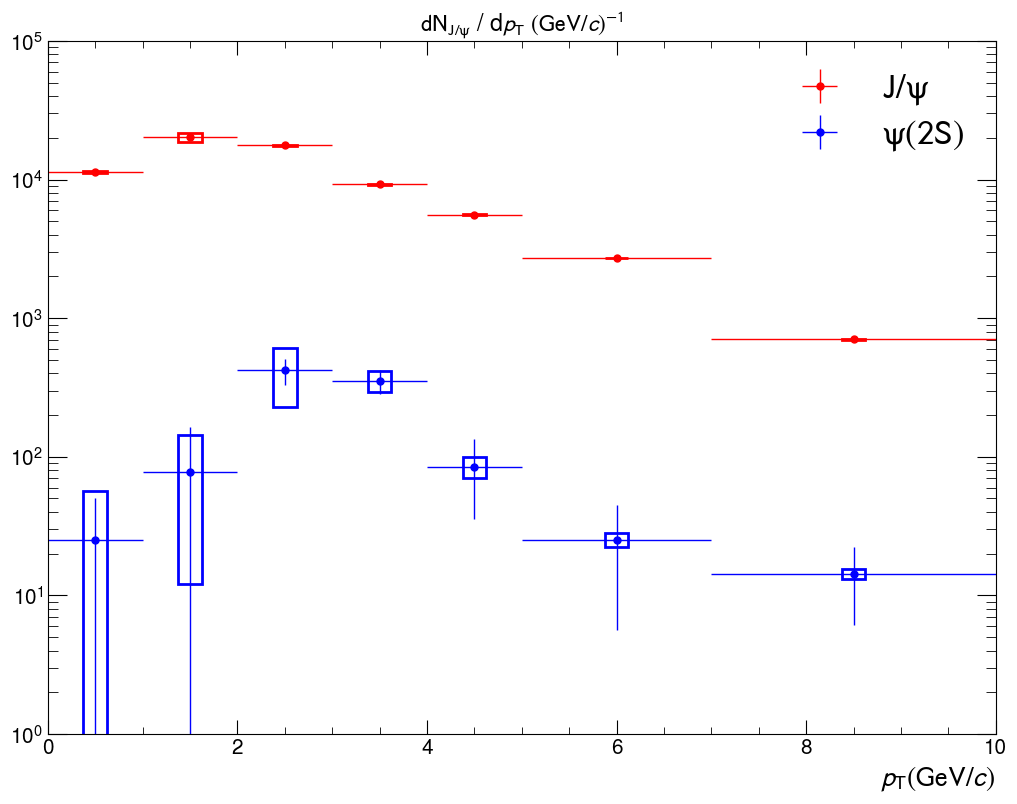

In [3]:
# Plot
fig, ax = plt.subplots()
plot_syst(ptOOTimeAssoc, 0.125, jpsiRawYieldOOTimeAssocVsPt, jpsiSystRawYieldOOTimeAssocVsPt, ax, 'red', 2)
ax.errorbar(ptOOTimeAssoc, jpsiRawYieldOOTimeAssocVsPt, xerr=errPtOOTimeAssoc, yerr=jpsiStatRawYieldOOTimeAssocVsPt, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=5, label=r'$J/\psi$')
plot_syst(ptOOTimeAssoc, 0.125, psi2sRawYieldOOTimeAssocVsPt, psi2sSystRawYieldOOTimeAssocVsPt, ax, 'blue', 2)
ax.errorbar(ptOOTimeAssoc, psi2sRawYieldOOTimeAssocVsPt, xerr=errPtOOTimeAssoc, yerr=psi2sStatRawYieldOOTimeAssocVsPt, fmt='o', color='blue', ecolor='blue', markerfacecolor='blue', markersize=5, label=r'$\psi(\rm{2S})$')
ax.set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=20, labelpad=5)
ax.set_title(r'$dN_{J/\psi}$ / d$\it{p}_{\rm{T}}$ $(GeV/\it{c})^{-1}$')
ax.yaxis.set_label_coords(-0.08, 0.8)
ax.set_yscale('log')
ax.set_ylim(1, 1e5)
ax.set_xlim(0, 10)
ax.tick_params(axis='x', labelsize=15, labelbottom=True)
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=25)
plt.show()

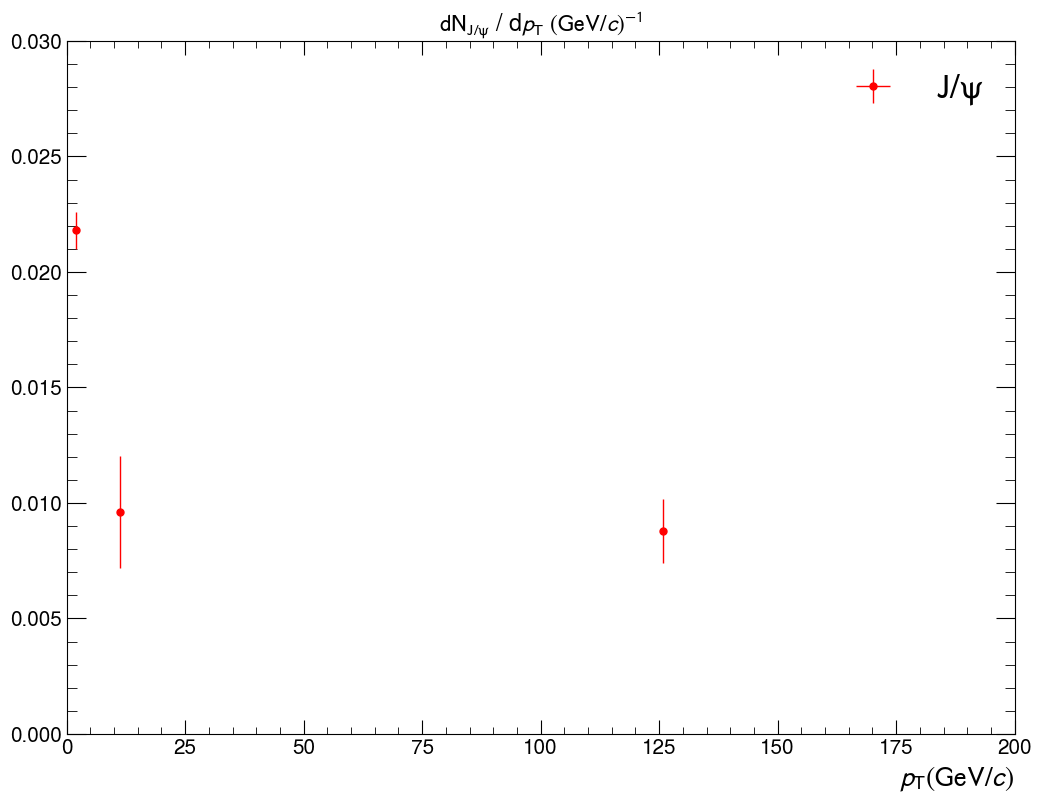

In [16]:
nPart = np.array([125.90, 11.35, 2.00])
errNPart = np.array([0, 0, 0])
ratioPsi2sOverJpsi = np.array([0.00879, 0.00961, 0.0218])
statErrRatioPsi2sOverJpsi = np.array([0.00140, 0.00241, 0.0008])
systErrratioPsi2sOverJpsi = np.array([0.00092, 0.00044, 0.0013])

fig, ax = plt.subplots()
#plot_syst(ptOOTimeAssoc, 0.125, jpsiRawYieldOOTimeAssocVsPt, jpsiSystRawYieldOOTimeAssocVsPt, ax, 'red', 2)
ax.errorbar(nPart, ratioPsi2sOverJpsi, xerr=errNPart, yerr=statErrRatioPsi2sOverJpsi, fmt='o', color='red', ecolor='red', markerfacecolor='red', markersize=5, label=r'$J/\psi$')
ax.set_xlabel(r'$\it{p}_{\rm{T}} (\rm{GeV}/\it{c})$', fontsize=20, labelpad=5)
ax.set_title(r'$dN_{J/\psi}$ / d$\it{p}_{\rm{T}}$ $(GeV/\it{c})^{-1}$')
ax.yaxis.set_label_coords(-0.08, 0.8)
#ax.set_yscale('log')
ax.set_ylim(0, 0.03)
ax.set_xlim(0, 200)
ax.tick_params(axis='x', labelsize=15, labelbottom=True)
ax.tick_params(axis='y', labelsize=15)
ax.legend(fontsize=25)
plt.show()